##$$Base\:Question\:Plots$$

####Imports

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed
from IPython.display import Image
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

from solve_system import derivs, solve_system, get_sol, get_sol_direct
from plots import plot_pos

:0: FutureWarning: IPython widgets are experimental and may change in the future.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



In [3]:
M = 1e11
S = 1e11
rS = 25
N = 12
t = np.linspace(0,1,400)

### I used 1 time step with 400 points

###Retrograde Passage

In this simulation, $S$ is passing by galaxy $M$ opposite the direction that the stars are orbiting. By using interact and an animation, you can watch the system behavior develop over time.

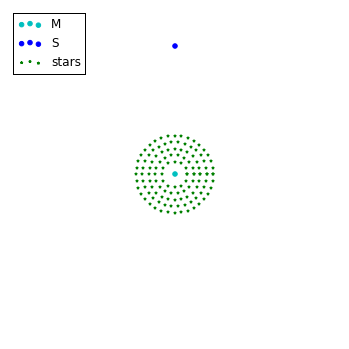

In [4]:
rx, ry, sx, sy = get_sol(rS, t, M, S, N)
interact(plot_pos, j = (0,len(t)-1), rx = fixed(rx), ry = fixed(ry), sx=fixed(sx), sy=fixed(sy));

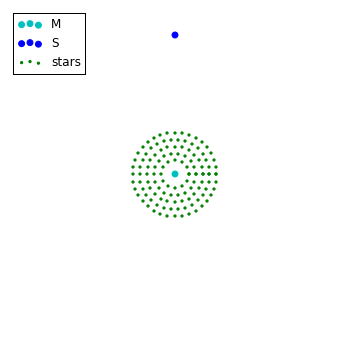

In [5]:
#Setting initial conditions for animation
duration = 16.666666666666
fig = plt.figure(figsize= (6,6))
ax = plt.gca()
scat1=plt.scatter(0,0,color= 'c', label= 'M', s=35)
scat2=plt.scatter(sx[0], sy[0], color = 'b', label = 'S', s=35)
scat3=plt.scatter(rx[0], ry[0], color = 'g', label = 'stars', s=5)
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.box(False)
plt.legend(loc='upper left')
plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')

def makeframe(t):
    j = int(400*t/duration) #seting time steps
    scat2.set_offsets(np.transpose(np.vstack([sx[j], sy[j]])))
    scat3.set_offsets(np.transpose(np.vstack([rx[j], ry[j]])))
    return mplfig_to_npimage(fig)

In [6]:
animation=mpy.VideoClip(makeframe, duration = duration)
animation.ipython_display(fps=24)

In [7]:
animation.write_videofile('base_retro.mp4', fps=24)

[MoviePy] >>>> Building video base_retro.mp4
[MoviePy] Writing video base_retro.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: base_retro.mp4 



In [11]:
m = mpy.VideoFileClip('base_retro.mp4')
m.ipython_display(fps=24)

|######----| 246/401  61% [elapsed: 00:00 left: 00:00, 490.29 iters/sec]

  UserWarning)



###Static Retrograde Plots
For these plots, I chose times at which I thought best matched with the simulation done by Toomre and Toomre.

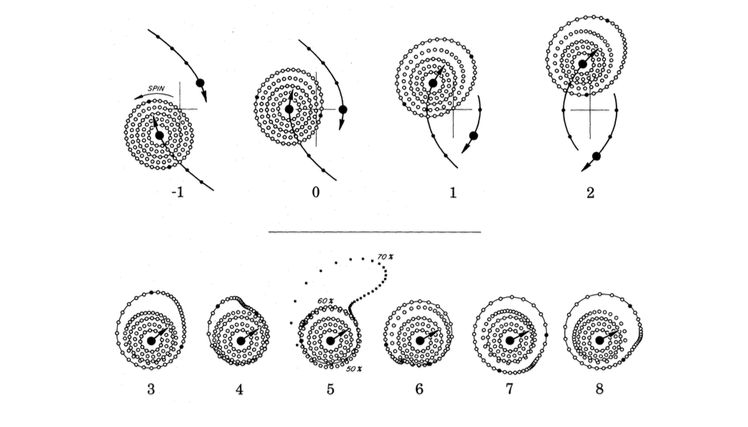

In [11]:
Image(filename='retrograde_passage.Toomre.png')

In [10]:
times = np.array([[80, 139, 197], [314, 356, 399]])
rx, ry, sx, sy = get_sol(rS, t, M, S, N)

def sub_retro(rx, ry, sx, sy, times):
    """Creates a 2 by 3 subplot of the system at 6 chosen times
    
    Parameters
    ----------
    rx: array, x postitions of all stars
    ry: array, y postitions of all stars
    sx: array, x postitions of S
    sy: array, y postitions of S
    times: list or array length 6, times at which you are plotting
    
    Returns
    -------
    2 by 3 subplot of the system at 6 chosen times
    """
    fig, ax  = plt.subplots(2,3, figsize=(12,8))
    c=1
    for i in range(2):
        for j in range(3):
            plt.sca(ax[i,j])
            t=times[i,j]
            plt.scatter(0,0,color= 'c', label= 'M', s=40)
            plt.scatter(sx[t], sy[t], color = 'b', label = 'S', s=40)
            plt.scatter(rx[t], ry[t], color = 'g', label = 'stars', s=7)
            plt.xlabel(c+2, fontsize=15)
            plt.xlim(-45,45)
            plt.ylim(-45,45)
            plt.box(False)
            plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
            plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')
            c+=1
    plt.tight_layout()

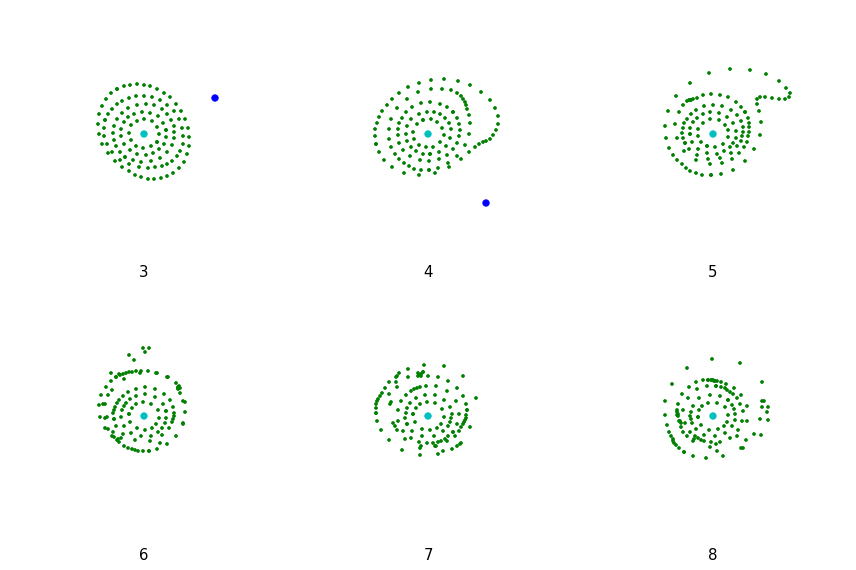

In [11]:
sub_retro(rx, ry, sx, sy, times)

###Direct Passage

In this simulation, $S$ is passing by galaxy $M$ in the same direction as the stars are orbiting. 

In [12]:
rx1, ry1, sx1, sy1 = get_sol_direct(rS, t, M, S, N)
#setting initial conditions for animation
duration = 16.666666666666
fig = plt.figure(figsize= (6,6))
ax = plt.gca()
scat1=plt.scatter(0,0,color= 'c', label= 'M', s=40)
scat2=plt.scatter(sx1[0], sy1[0], color = 'b', label = 'S', s=40)
scat3=plt.scatter(rx1[0], ry1[0], color = 'g', label = 'stars', s=7)
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.box(False)
plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')

def makeframe(t):
    j = int(400*t/duration) #sets time for given druation and frame rate
    scat2.set_offsets(np.transpose(np.vstack([sx1[j], sy1[j]])))
    scat3.set_offsets(np.transpose(np.vstack([rx1[j], ry1[j]])))
    return mplfig_to_npimage(fig)

In [13]:
animation=mpy.VideoClip(makeframe, duration = duration)
animation.ipython_display(fps=24)

In [14]:
animation.write_videofile('base_direct.mp4', fps=24)

[MoviePy] >>>> Building video base_direct.mp4
[MoviePy] Writing video base_direct.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: base_direct.mp4 



###Static Direct Plots
For these plots, I once again chose times at which I thought best matched the simulation done by Toomre and Toomre. 

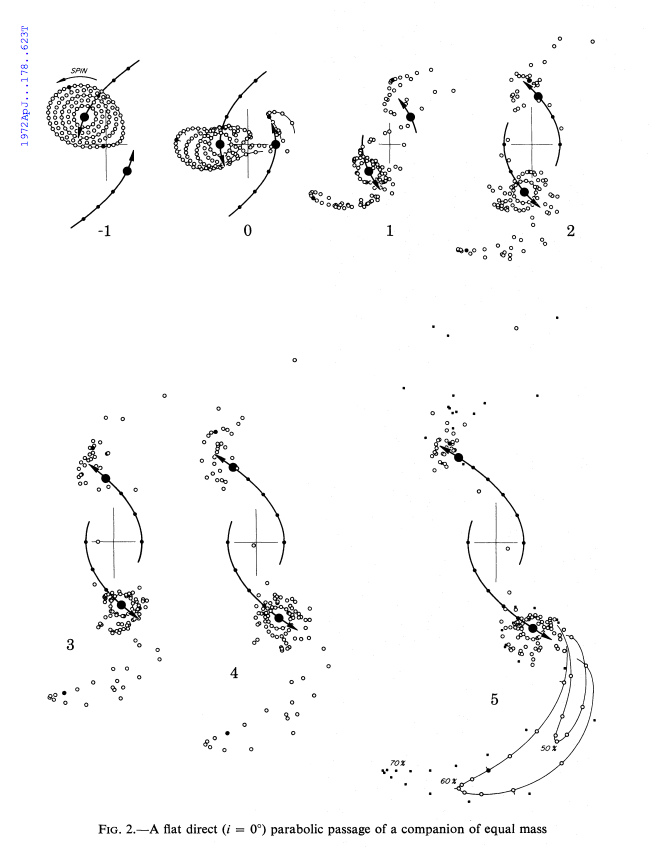

In [16]:
Image(filename='direct_passage_Toomre.png')

In [17]:
time2 = np.array([[0, 64, 85, 128], [142, 203, 242, 273]])
rx1, ry1, sx1, sy1 = get_sol_direct(rS, t, M, S, N)
def sub_direct(rx, ry, sx, sy, time):
    """Creates a 2 by 4 subplot of the system at 7 chosen times
    
    Parameters
    ----------
    rx: array, x postitions of all stars
    ry: array, y postitions of all stars
    sx: array, x postitions of S
    sy: array, y postitions of S
    times: array size 2 by 4, 7 times at which you are plotting
    
    Returns
    -------
    2 by 4 subplot of the system at 7 chosen times
    """
    c=1
    fig, ax = plt.subplots(2,4, figsize=(20,10))
    for i in range(2):
        for j in range(4):
            plt.sca(ax[i,j])
            t = time[i,j]
            plt.scatter(0,0,color= 'b', label= 'M', s=30)
            plt.scatter(sx1[t], sy1[t], color = 'r', label = 'S', s=30)
            plt.scatter(rx1[t], ry1[t], color = 'g', label = 'stars', s=5)
            plt.xlabel(c-3, fontsize=15)
            plt.xlim(-60,60)
            plt.ylim(-60,60)
            plt.box(False)
            plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
            plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')
            c+=1
    plt.tight_layout()

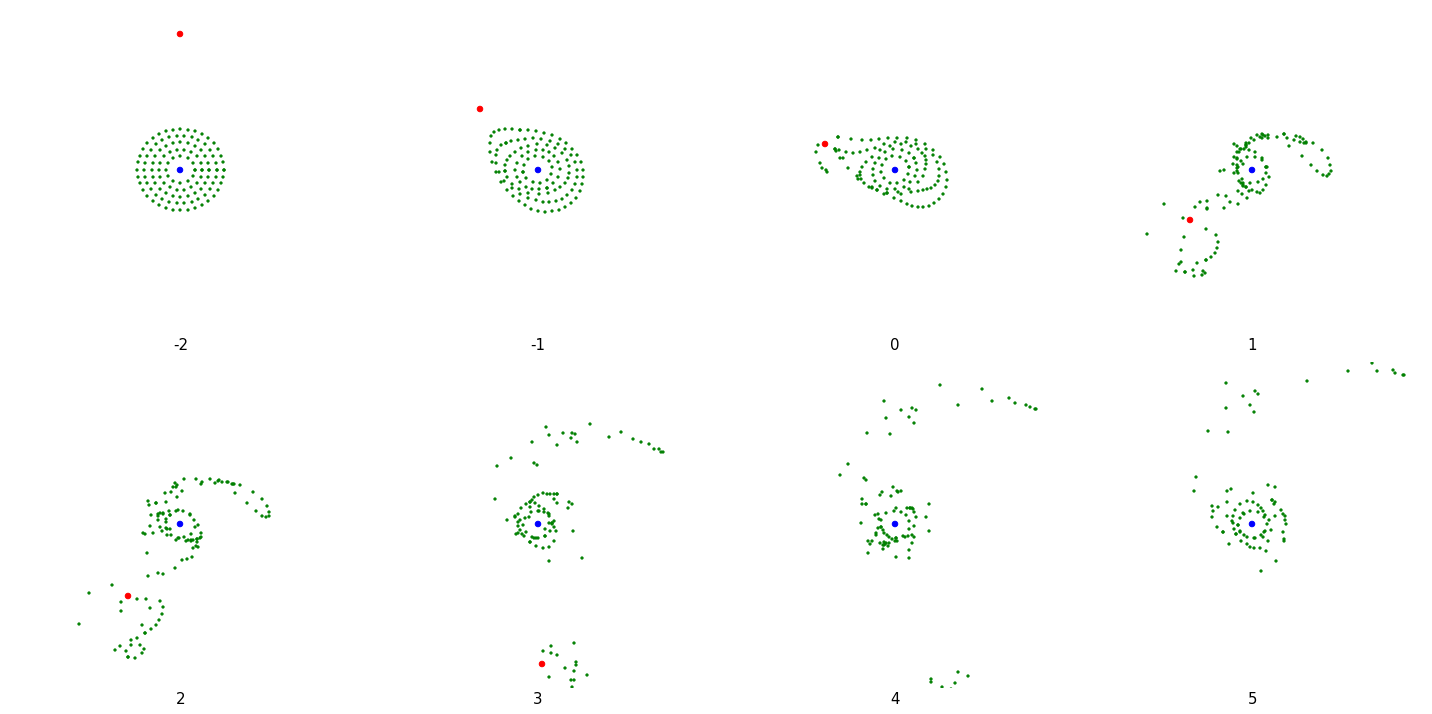

In [18]:
sub_direct(rx1, ry1, sx1, sy1, time2)